In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [2]:
data = pd.read_csv("../house_prices_selection.csv")

In [3]:
data.shape

(1460, 32)

    DROPNA

In [4]:
data_dropna = data.dropna()

In [5]:
data_dropna.shape

(1164, 32)

In [6]:
X_dropna = data_dropna.drop("SalePrice", axis=1)
y_dropna = data_dropna["SalePrice"]

numeric_columns = X_dropna.select_dtypes(include=["number"]).columns
categorical_columns = X_dropna.select_dtypes(include=["object"]).columns

In [7]:
X_train_dropna, X_test_dropna, y_train_dropna, y_test_dropna = train_test_split(
    X_dropna, y_dropna, test_size=0.2, random_state=42
)

In [8]:
preprocessor_dropna = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_columns),
        ("num", StandardScaler(), numeric_columns),
    ]
)

model_dropna = Pipeline(steps=[
    ("preprocess", preprocessor_dropna),
    ("model", LinearRegression())
])

In [9]:
model_dropna.fit(X_train_dropna, y_train_dropna)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['KitchenQual', 'PavedDrive', 'BsmtQual', 'CentralAir', 'Foundation'], dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['EVI', 'ZoningScore', 'Price_per_m^2', 'PDI', 'LotFrontage', 'LotArea',
       'WoodDeckSF', 'OpenPorchSF', 'FullBath', 'GarageCars', 'GarageArea',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GrLivArea',
       'TotalBsmtSF', '1stFlrSF'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [10]:
preds_dropna = model_dropna.predict(X_test_dropna)
rmse_dropna = np.sqrt(mean_squared_error(y_test_dropna, preds_dropna))
mae_dropna = mean_absolute_error(y_test_dropna, preds_dropna)
mse_dropna = mean_squared_error(y_test_dropna, preds_dropna)
r2_dropna = r2_score(y_test_dropna, preds_dropna)

print(f"\nRMSE with dropna: {rmse_dropna:.3f}")
print(f"MAE dropna: {mae_dropna:.3f}")
print(f"MSE dropna: {mse_dropna:.3f}")
print(f"R2 dropna: {r2_dropna:.4f}")


RMSE with dropna: 35644.286
MAE dropna: 21785.021
MSE dropna: 1270515095.004
R2 dropna: 0.8330


    SIMPLEIMPUTER

In [11]:
X = data.drop("SalePrice", axis=1)
y = data["SalePrice"]

X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor_imputer = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numeric_columns),
        ("cat", categorical_transformer, categorical_columns),
    ]
)

model_imputer = Pipeline(steps=[
    ("preprocess", preprocessor_imputer),
    ("model", LinearRegression())
])

In [13]:
model_imputer.fit(X_train_i, y_train_i)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['EVI', 'ZoningScore', 'Price_per_m^2', 'PDI', 'LotFrontage', 'LotArea',
       'WoodDeckSF', 'OpenPorchSF', 'FullBath', 'GarageCars', 'GarageArea',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GrLivArea',
       'TotalBsmtSF', '1stFlrSF'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['KitchenQual', 'PavedDrive', 'BsmtQual', 'CentralAir', 'Foundation'], dtype='object'))])),
                ('model', LinearRegression())])

In [14]:
preds_imputer = model_imputer.predict(X_test_i)
rmse_imputer = np.sqrt(mean_squared_error(y_test_i, preds_imputer))
mae_imputer = mean_absolute_error(y_test_i, preds_imputer)
mse_imputer = mean_squared_error(y_test_i, preds_imputer)
r2_imputer = r2_score(y_test_i, preds_imputer)

print(f"\nRMSE: {rmse_imputer:.3f}")
print(f"MAE: {mae_imputer:.3f}")
print(f"MSE: {mse_imputer:.3f}")
print(f"R2: {r2_imputer:.4f}")


RMSE: 33930.642
MAE: 21539.103
MSE: 1151288461.372
R2: 0.8499


In [15]:
print(f"RMSE Dropna: {rmse_dropna:.3f}")
print(f"RMSE SimpleImputer: {rmse_imputer:.3f}")

print(f"\nMAE Dropna: {mae_dropna:.3f}")
print(f"MAE SimpleImputer: {mae_imputer:.3f}")

print(f"\nMSE Dropna: {mse_dropna:.3f}")
print(f"MSE SimpleImputer: {mse_imputer:.3f}")

print(f"\nR² Dropna: {r2_dropna:.4f}")
print(f"R² SimpleImputer: {r2_imputer:.4f}")

RMSE Dropna: 35644.286
RMSE SimpleImputer: 33930.642

MAE Dropna: 21785.021
MAE SimpleImputer: 21539.103

MSE Dropna: 1270515095.004
MSE SimpleImputer: 1151288461.372

R² Dropna: 0.8330
R² SimpleImputer: 0.8499


    Conclusion

    The model trained with dropna performs worse on all evaluation metrics. This happens because dropna eliminates a significant portion of the dataset reducing the amount of useful information available to the model.

    The model trained with SimpleImputer approach keeps all rows by filling in missing values. As a result, the model has more data to learn from and achieves better predictive performance.

    Therefore, using SimpleImputer is more appropriate for this dataset.

    DecisionTreeRegressor

In [16]:
X = data.drop("SalePrice", axis=1)
y = data["SalePrice"]

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(
    X, y, test_size=0.2, random_state=42
)

numeric_columns = X_train_t.select_dtypes(include=["number"]).columns
categorical_columns = X_train_t.select_dtypes(include=["object"]).columns

In [17]:
preprocessor_tree = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="mean"), numeric_columns),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), categorical_columns),
    ]
)

model_tree = Pipeline(steps=[
    ("preprocess", preprocessor_tree),
    ("model", DecisionTreeRegressor(random_state=42))
])

In [18]:
model_tree.fit(X_train_t, y_train_t)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['EVI', 'ZoningScore', 'Price_per_m^2', 'PDI', 'LotFrontage', 'LotArea',
       'WoodDeckSF', 'OpenPorchSF', 'FullBath', 'GarageCars', 'GarageArea',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GrLivArea',
       'TotalBsmtSF', '1stFlrSF'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['KitchenQual', 'PavedDrive', 'BsmtQual', 'CentralAir', 'Foundation'], dtype='object'))])),
                ('model', DecisionTreeRegressor(random_state=42))])

In [19]:
param_grid_dt = {
    'model__max_depth': [None, 5, 10, 15, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4, 8],
    'model__max_features': ['sqrt', 'log2', None],
    'model__criterion': ['squared_error', 'friedman_mse']
}

grid_dt = GridSearchCV(
    estimator=model_tree,
    param_grid=param_grid_dt,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    verbose=1
)

In [20]:
grid_dt.fit(X_train_t, y_train_t)

print(grid_dt.best_params_)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
{'model__criterion': 'squared_error', 'model__max_depth': 15, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 10}


In [21]:
best_tree_model = grid_dt.best_estimator_

In [22]:
preds_tree = best_tree_model.predict(X_test_t)

In [23]:
rmse_tree = np.sqrt(mean_squared_error(y_test_t, preds_tree))
mae_tree = mean_absolute_error(y_test_t, preds_tree)
mse_tree = mean_squared_error(y_test_t, preds_tree)
r2_tree = r2_score(y_test_t, preds_tree)

print(f"RMSE: {rmse_tree:.3f}")
print(f"MAE: {mae_tree:.3f}")
print(f"MSE: {mse_tree:.3f}")
print(f"R²: {r2_tree:.4f}")

RMSE: 40809.951
MAE: 27680.337
MSE: 1665452128.506
R²: 0.7829


    RandomForestRegressor

In [24]:
X = data.drop("SalePrice", axis=1)
y = data["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_columns = X_train.select_dtypes(include=["number"]).columns
categorical_columns = X_train.select_dtypes(include=["object"]).columns

In [25]:
preprocessor_rf = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="median"), numeric_columns),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("encoder", OneHotEncoder(handle_unknown="ignore"))
        ]), categorical_columns)
    ]
)

rf_model = Pipeline(steps=[
    ("preprocess", preprocessor_rf),
    ("regressor", RandomForestRegressor(random_state=42))
])

In [26]:
rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['EVI', 'ZoningScore', 'Price_per_m^2', 'PDI', 'LotFrontage', 'LotArea',
       'WoodDeckSF', 'OpenPorchSF', 'FullBath', 'GarageCars', 'GarageArea',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GrLivArea',
       'TotalBsmtSF', '1stFlrSF'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['KitchenQual', 'PavedDrive', 'BsmtQual', 'CentralAir', 'Foundation'], dtype='object'))])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [27]:
param_grid_rf = {
    'regressor__n_estimators': [100, 300, 500],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__max_features': ['sqrt', 'log2', None],
    'regressor__bootstrap': [True]
}

grid_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         SimpleImputer(strategy='median'),
                                                                         Index(['EVI', 'ZoningScore', 'Price_per_m^2', 'PDI', 'LotFrontage', 'LotArea',
       'WoodDeckSF', 'OpenPorchSF', 'FullBath', 'GarageCars', 'GarageArea',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GrLivArea',
       'TotalBsmtSF', '1s...
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__bootstrap': [True],
                         'regressor__max_depth': [None, 10, 20],
                         'regressor__max_features': ['sqrt', 'log2', None],
                         'regressor__min_samples_leaf': [1, 2, 4],
                         'regressor__min_samples_split': [2, 5, 10],
                         'regressor__n_estimators': [100, 300, 500]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [28]:
best_rf = grid_rf.best_estimator_
preds_rf = best_rf.predict(X_test)

In [29]:
rmse_rf = np.sqrt(mean_squared_error(y_test, preds_rf))
mae_rf  = mean_absolute_error(y_test, preds_rf)
mse_rf  = mean_squared_error(y_test, preds_rf)
r2_rf   = r2_score(y_test, preds_rf)

print(f"RMSE: {rmse_rf:.3f}")
print(f"MAE: {mae_rf:.3f}")
print(f"MSE: {mse_rf:.3f}")
print(f"R²: {r2_rf:.3f}")

RMSE: 27004.197
MAE: 15956.537
MSE: 729226671.591
R²: 0.905


In [30]:
print(f"RMSE DecisionTree: {rmse_tree:.3f}")
print(f"RMSE RandomForest: {rmse_rf:.3f}")

print(f"MAE DecisionTree: {mae_tree:.3f}")
print(f"MAE RandomForest: {mae_rf:.3f}")

print(f"MSE DecisionTree: {mse_tree:.3f}")
print(f"MSE RandomForest: {mse_rf:.3f}")

print(f"R² DecisionTree: {r2_tree:.4f}")
print(f"R² RandomForest: {r2_rf:.4f}")

RMSE DecisionTree: 40809.951
RMSE RandomForest: 27004.197
MAE DecisionTree: 27680.337
MAE RandomForest: 15956.537
MSE DecisionTree: 1665452128.506
MSE RandomForest: 729226671.591
R² DecisionTree: 0.7829
R² RandomForest: 0.9049


    RandomForest model performed better than the DecisionTree, it achieved lower RMSE, MAE, and MSE, and a higher R² score. 
    This means it predicts house prices more accurately and generalizes better

    XGBoost

In [31]:
from xgboost import XGBRegressor

preprocessor_xgb = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="median"), numeric_columns),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), categorical_columns)
    ]
)

In [32]:
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [33]:
pipeline_xgb = Pipeline(steps=[
    ("preprocess", preprocessor_xgb),
    ("regressor", xgb_model)
])

In [34]:
pipeline_xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['EVI', 'ZoningScore', 'Price_per_m^2', 'PDI', 'LotFrontage', 'LotArea',
       'WoodDeckSF', 'OpenPorchSF', 'FullBath', 'GarageCars', 'GarageArea',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GrLivArea',
       'TotalBsmtSF', '1stFlrSF'],
      dtype='object')),
                                                 ('...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=500, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [35]:
preds_xgb = pipeline_xgb.predict(X_test)

In [36]:
rmse_xgb = np.sqrt(mean_squared_error(y_test, preds_xgb))
mae_xgb = mean_absolute_error(y_test, preds_xgb)
mse_xgb = mean_squared_error(y_test, preds_xgb)
r2_xgb = r2_score(y_test, preds_xgb)

print(f"RMSE: {rmse_xgb:.3f}")
print(f"MAE: {mae_xgb:.3f}")
print(f"MSE: {mse_xgb:.3f}")
print(f"R²: {r2_xgb:.3f}")

RMSE: 18211.317
MAE: 10761.965
MSE: 331652079.840
R²: 0.957


    LightGBM

In [37]:
from lightgbm import LGBMRegressor

preprocessor_lgbm = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="median"), numeric_columns),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), categorical_columns)
    ]
)

In [38]:
lgbm_model = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,           
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [39]:
pipeline_lgbm = Pipeline(steps=[
    ("preprocess", preprocessor_lgbm),
    ("regressor", lgbm_model)
])

In [40]:
pipeline_lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2722
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 35
[LightGBM] [Info] Start training from score 181441.541952


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['EVI', 'ZoningScore', 'Price_per_m^2', 'PDI', 'LotFrontage', 'LotArea',
       'WoodDeckSF', 'OpenPorchSF', 'FullBath', 'GarageCars', 'GarageArea',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GrLivArea',
       'TotalBsmtSF', '1stFlrSF'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['KitchenQual', 'PavedDrive', 'BsmtQual', 'CentralAir', 'Foundation'], dtype='object'))])),
                ('regressor',
                 LGBMRegressor(colsample_bytree=0.8, learning_rate=0.05,
                               n_estimators=500, random_state=42,
                               subsample=0.8))])

In [41]:
preds_lgbm = pipeline_lgbm.predict(X_test)

In [42]:
rmse_lgbm = np.sqrt(mean_squared_error(y_test, preds_lgbm))
mae_lgbm = mean_absolute_error(y_test, preds_lgbm)
mse_lgbm = mean_squared_error(y_test, preds_lgbm)
r2_lgbm = r2_score(y_test, preds_lgbm)

print(f"RMSE: {rmse_lgbm:.3f}")
print(f"MAE: {mae_lgbm:.3f}")
print(f"MSE: {mse_lgbm:.3f}")
print(f"R²: {r2_lgbm:.3f}")

RMSE: 21211.017
MAE: 11264.111
MSE: 449907234.466
R²: 0.941


    CatBoost

In [43]:
from catboost import CatBoostRegressor

for col in categorical_columns:
    X_train[col] = X_train[col].astype(str).fillna("NA")
    X_test[col] = X_test[col].astype(str).fillna("NA")

cat_features_indices = [X_train.columns.get_loc(col) for col in categorical_columns]

In [44]:
cat_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function='RMSE',
    verbose=False,
    random_state=42
)

In [45]:
cat_model.fit(
    X_train,
    y_train,
    cat_features=cat_features_indices
)

In [46]:
preds_cat = cat_model.predict(X_test)

In [47]:
rmse_cat = np.sqrt(mean_squared_error(y_test, preds_cat))
mae_cat  = mean_absolute_error(y_test, preds_cat)
mse_cat  = mean_squared_error(y_test, preds_cat)
r2_cat   = r2_score(y_test, preds_cat)

print(f"RMSE: {rmse_cat:.3f}")
print(f"MAE: {mae_cat:.3f}")
print(f"MSE: {mse_cat:.3f}")
print(f"R²: {r2_cat:.3f}")

RMSE: 19028.226
MAE: 10959.702
MSE: 362073395.444
R²: 0.953


In [48]:
results = {
    "Model": [
        "Linear Regression",
        "Decision Tree",
        "Random Forest",
        "XGBoost",
        "LightGBM",
        "CatBoost"
    ],
    "RMSE": [
        rmse_imputer,
        rmse_tree,
        rmse_rf,
        rmse_xgb,
        rmse_lgbm,
        rmse_cat
    ],
    "MAE": [
        mae_imputer,
        mae_tree,
        mae_rf,
        mae_xgb,
        mae_lgbm,
        mae_cat
    ],
    "MSE": [
        mse_imputer,
        mse_tree,
        mse_rf,
        mse_xgb,
        mse_lgbm,
        mse_cat
    ],
    "R²": [
        r2_imputer,
        r2_tree,
        r2_rf,
        r2_xgb,
        r2_lgbm,
        r2_cat
    ]
}

df_results = pd.DataFrame(results)
df_results

,Model,RMSE,MAE,MSE,R²
0,Linear Regression,33930.641924,21539.103038,1.151288e+09,0.849904
1,Decision Tree,40809.951342,27680.336899,1.665452e+09,0.782871
2,Random Forest,27004.197296,15956.537285,7.292267e+08,0.904929
3,XGBoost,18211.317356,10761.964723,3.316521e+08,0.956762
4,LightGBM,21211.016818,11264.110807,4.499072e+08,0.941344
5,CatBoost,19028.226282,10959.702166,3.620734e+08,0.952796


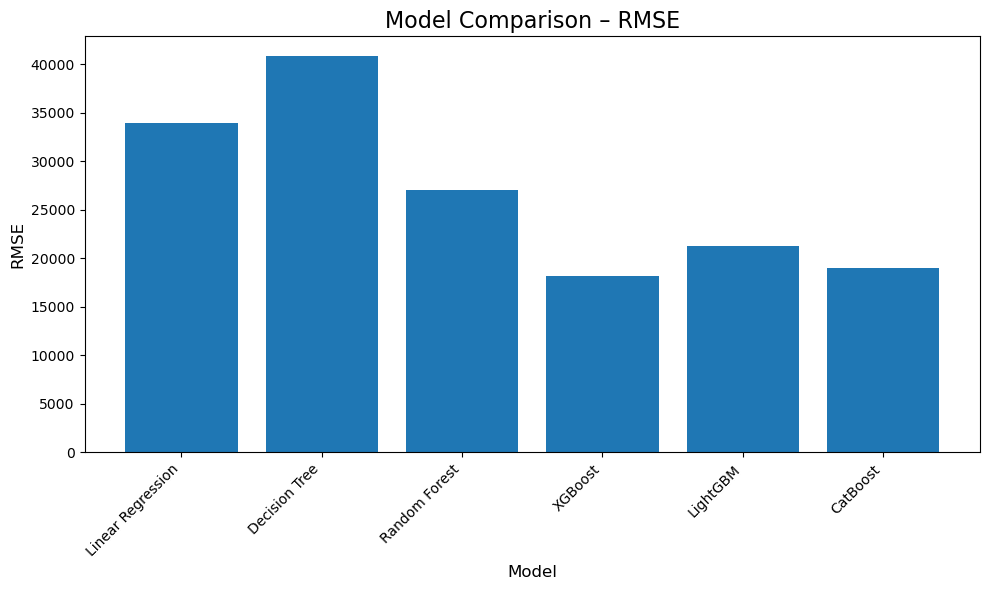

In [49]:
plt.figure(figsize=(10, 6))
plt.bar(df_results["Model"], df_results["RMSE"])

plt.title("Model Comparison – RMSE", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

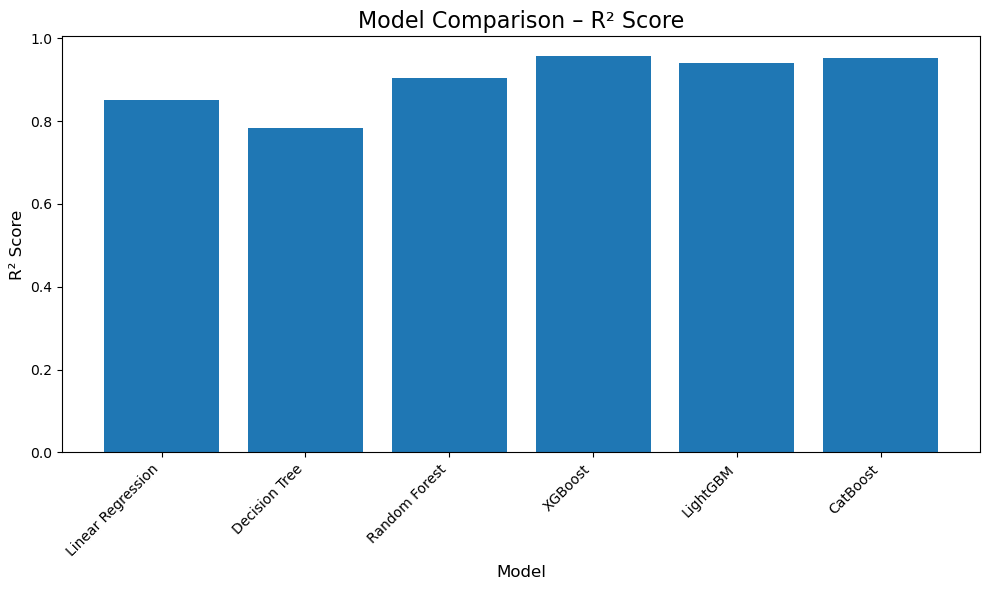

In [50]:
plt.figure(figsize=(10, 6))
plt.bar(df_results["Model"], df_results["R²"])

plt.title("Model Comparison – R² Score", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("R² Score", fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

    RandomizedSearchCV on XGBRegressor

In [51]:
preprocessor_xgb = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="median"), numeric_columns),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), categorical_columns)
    ]
)

xgb_base = XGBRegressor(random_state=42, objective="reg:squarederror")

xgb_param_dist = {
    "regressor__n_estimators": [300, 500, 800],
    "regressor__learning_rate": [0.01, 0.03, 0.05, 0.1],
    "regressor__max_depth": [4, 6, 8, 10],
    "regressor__subsample": [0.6, 0.8, 1.0],
    "regressor__colsample_bytree": [0.6, 0.8, 1.0],
}

xgb_pipeline = Pipeline([
    ("preprocess", preprocessor_xgb),
    ("regressor", xgb_base)
])

xgb_search = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=xgb_param_dist,
    n_iter=20,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    random_state=42,
    verbose=1
)

xgb_search.fit(X_train, y_train)
best_xgb = xgb_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


    RandomizedSearchCV on LGBMRegressor

In [52]:
preprocessor_lgbm = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="median"), numeric_columns),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), categorical_columns)
    ]
)

lgbm_base = LGBMRegressor(random_state=42)

lgbm_param_dist = {
    "regressor__n_estimators": [300, 500, 800],
    "regressor__learning_rate": [0.01, 0.03, 0.05],
    "regressor__max_depth": [-1, 6, 10, 15],
    "regressor__num_leaves": [20, 31, 40, 60],
    "regressor__subsample": [0.6, 0.8, 1.0],
    "regressor__colsample_bytree": [0.6, 0.8, 1.0]
}

lgbm_pipeline = Pipeline([
    ("preprocess", preprocessor_lgbm),
    ("regressor", lgbm_base)
])

lgbm_search = RandomizedSearchCV(
    estimator=lgbm_pipeline,
    param_distributions=lgbm_param_dist,
    n_iter=20,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    random_state=42,
    verbose=1
)

lgbm_search.fit(X_train, y_train)
best_lgbm = lgbm_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2633
[LightGBM] [Info] Number of data points in the train set: 934, number of used features: 35
[LightGBM] [Info] Start training from score 181121.274090
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001367 seconds.
You can set `force_row_wise=true` to remove the ov

    RandomizedSearchCV on CatBoostRegressor

In [53]:
for col in categorical_columns:
    X_train[col] = X_train[col].astype(str).fillna("NA")
    X_test[col]  = X_test[col].astype(str).fillna("NA")

cat_features_idx = [X_train.columns.get_loc(col) for col in categorical_columns]

cat_model = CatBoostRegressor(
    random_state=42,
    loss_function="RMSE",
    verbose=False
)

cat_param_dist = {
    "iterations": [300, 500, 800],
    "learning_rate": [0.01, 0.03, 0.05],
    "depth": [4, 6, 8, 10],
    "l2_leaf_reg": [1, 3, 5, 7, 10],
    "bagging_temperature": [0.0, 0.5, 1.0]
}

cat_search = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=cat_param_dist,
    n_iter=20,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    random_state=42,
    verbose=1
)

cat_search.fit(X_train, y_train, cat_features=cat_features_idx)
best_cat = cat_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [54]:
def evaluate_model(name, model, X_test, y_test):
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    return [name, rmse, mae, mse, r2]

results = []

results.append(evaluate_model("XGBRegressor",  best_xgb,  X_test, y_test))
results.append(evaluate_model("LGBMRegressor", best_lgbm, X_test, y_test))
results.append(evaluate_model("CatBoostRegressor", best_cat, X_test, y_test))

df_results = pd.DataFrame(
    results,
    columns=["Model", "RMSE", "MAE", "MSE", "R²"]
)

print(df_results)

               Model          RMSE           MAE           MSE        R²
0       XGBRegressor  18576.555191  12067.363616  3.450884e+08  0.955010
1      LGBMRegressor  20688.939483  11811.086649  4.280322e+08  0.944196
2  CatBoostRegressor  16111.435983   9408.903494  2.595784e+08  0.966158


    CatBoost performed the best, with the lowest error and highest R², XGBoost was second, and LightGBM had the weakest results. 

In [55]:
X = data.drop("SalePrice", axis=1)
y = data["SalePrice"]

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.40, random_state=42
)

X_valid, X_test_final, y_valid, y_test_final = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)

In [56]:
numeric_columns  = X_train.select_dtypes(include=["number"]).columns
categorical_columns = X_train.select_dtypes(include=["object"]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="median"), numeric_columns),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), categorical_columns)
    ]
)

In [57]:
xgb = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("regressor", XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])

xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['EVI', 'ZoningScore', 'Price_per_m^2', 'PDI', 'LotFrontage', 'LotArea',
       'WoodDeckSF', 'OpenPorchSF', 'FullBath', 'GarageCars', 'GarageArea',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GrLivArea',
       'TotalBsmtSF', '1stFlrSF'],
      dtype='object')),
                                                 ('...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=500, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [58]:
pred_xgb_val = xgb.predict(X_valid)
rmse_xgb = np.sqrt(mean_squared_error(y_valid, pred_xgb_val))
r2_xgb = r2_score(y_valid, pred_xgb_val)

In [59]:
lgbm = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("regressor", LGBMRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=-1,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])

lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000484 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2605
[LightGBM] [Info] Number of data points in the train set: 876, number of used features: 33
[LightGBM] [Info] Start training from score 179921.786530


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['EVI', 'ZoningScore', 'Price_per_m^2', 'PDI', 'LotFrontage', 'LotArea',
       'WoodDeckSF', 'OpenPorchSF', 'FullBath', 'GarageCars', 'GarageArea',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GrLivArea',
       'TotalBsmtSF', '1stFlrSF'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['KitchenQual', 'PavedDrive', 'BsmtQual', 'CentralAir', 'Foundation'], dtype='object'))])),
                ('regressor',
                 LGBMRegressor(colsample_bytree=0.8, learning_rate=0.05,
                               n_estimators=500, random_state=42,
                               subsample=0.8))])

In [60]:
pred_lgbm_val = lgbm.predict(X_valid)
rmse_lgbm = np.sqrt(mean_squared_error(y_valid, pred_lgbm_val))
r2_lgbm = r2_score(y_valid, pred_lgbm_val)

In [61]:
X_train_cb = X_train.copy()
X_valid_cb = X_valid.copy()

for col in categorical_columns:
    X_train_cb[col] = X_train_cb[col].astype(str).fillna("NA")
    X_valid_cb[col] = X_valid_cb[col].astype(str).fillna("NA")

cat_features = [X_train_cb.columns.get_loc(col) for col in categorical_columns]

cat = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function='RMSE',
    verbose=False,
    random_state=42
)

cat.fit(X_train_cb, y_train, cat_features=cat_features)

In [62]:
pred_cat_val = cat.predict(X_valid_cb)
rmse_cat = np.sqrt(mean_squared_error(y_valid, pred_cat_val))
r2_cat = r2_score(y_valid, pred_cat_val)

In [63]:
results_val = pd.DataFrame({
    "Model": ["XGBoost", "LightGBM", "CatBoost"],
    "RMSE": [rmse_xgb, rmse_lgbm, rmse_cat],
    "R²": [r2_xgb, r2_lgbm, r2_cat]
})

In [64]:
results_val

,Model,RMSE,R²
0,XGBoost,25922.819086,0.928642
1,LightGBM,32212.150727,0.889817
2,CatBoost,27098.911613,0.922021


In [65]:
best_model_name = results_val.loc[results_val["RMSE"].idxmin(), "Model"]
best_model_name

'XGBoost'

In [66]:
if best_model_name == "XGBoost":
    best_model = xgb
elif best_model_name == "LightGBM":
    best_model = lgbm
else:
    best_model = cat

pred_final = best_model.predict(X_test_final)

In [67]:
rmse_final = np.sqrt(mean_squared_error(y_test_final, pred_final))
r2_final = r2_score(y_test_final, pred_final)

print("\nTest Evaluation (20%):")
print(f"Best Model: {best_model_name}")
print(f"RMSE: {rmse_final:.4f}")
print(f"R²: {r2_final:.4f}")


Test Evaluation (20%):
Best Model: XGBoost
RMSE: 16179.8681
R²: 0.9465


    Combinations with Stacking

In [68]:
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score

preprocess = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="median"), numeric_columns),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), categorical_columns)
    ]
)

xgb_base = XGBRegressor(
    n_estimators=300, 
    learning_rate=0.05, 
    max_depth=6,
    subsample=0.8, 
    colsample_bytree=0.8, 
    random_state=42
)

lgbm_base = LGBMRegressor(
    n_estimators=300, 
    learning_rate=0.05, 
    num_leaves=31,
    subsample=0.8, 
    colsample_bytree=0.8, 
    random_state=42
)

cat_base = CatBoostRegressor(
    iterations=300, 
    learning_rate=0.05, 
    depth=6,
    loss_function="RMSE", 
    verbose=False, 
    random_state=42
)

dt_base = DecisionTreeRegressor(random_state=42)
rf_base = RandomForestRegressor(random_state=42)
lin_base = LinearRegression()

In [69]:
stack1 = StackingRegressor(
    estimators=[
        ("xgb", xgb_base),
        ("lgbm", lgbm_base)
    ],
    final_estimator=cat_base
)

pipeline_stack1 = Pipeline([("preprocess", preprocessor), ("model", stack1)])
r2_stack1 = cross_val_score(pipeline_stack1, X, y, cv=5, scoring="r2").mean()
print(f"XGBoost + LGBM - CatBoost: R² = {r2_stack1:.4f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2711
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 35
[LightGBM] [Info] Start training from score 180717.091610
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2624
[LightGBM] [Info] Number of data points in the train set: 934, number of used features: 34
[LightGBM] [Info] Start training from score 179921.700214
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000262 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 934, number of used features: 34
[LightGBM] [Info] Star

In [70]:
stack2 = StackingRegressor(
    estimators=[
        ("rf", rf_base),
        ("xgb", xgb_base)
    ],
    final_estimator=lgbm_base
)

pipeline_stack2 = Pipeline([("preprocess", preprocessor), ("model", stack2)])
r2_stack2 = cross_val_score(pipeline_stack2, X, y, cv=5, scoring="r2").mean()
print(f"RandomForest + XGBoost - LightGBM): R² = {r2_stack2:.4f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003986 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180717.091610
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180407.575342
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start tr

In [71]:
stack3 = StackingRegressor(
    estimators=[
        ("dt", dt_base),
        ("rf", rf_base),
        ("lgbm", lgbm_base)
    ],
    final_estimator=xgb_base
)

pipeline_stack3 = Pipeline([("preprocess", preprocessor), ("model", stack3)])
r2_stack3 = cross_val_score(pipeline_stack3, X, y, cv=5, scoring="r2").mean()
print(f"DecisionTree + RandomForest + LightGBM - XGBoost: R² = {r2_stack3:.4f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000456 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2711
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 35
[LightGBM] [Info] Start training from score 180717.091610
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2624
[LightGBM] [Info] Number of data points in the train set: 934, number of used features: 34
[LightGBM] [Info] Start training from score 179921.700214
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the tr

In [72]:
stack4 = StackingRegressor(
    estimators=[
        ("xgb", xgb_base),
        ("cat", cat_base)
    ],
    final_estimator=lin_base
)

pipe_stack4 = Pipeline([("preprocess", preprocessor), ("model", stack4)])
r2_stack4 = cross_val_score(pipe_stack4, X, y, cv=5, scoring="r2").mean()
print(f"XGBoost + CatBoost - Linear: R² = {r2_stack4:.4f}")

XGBoost + CatBoost - Linear: R² = 0.9345


In [73]:
stack5 = StackingRegressor(
    estimators=[
        ("rf", rf_base),
        ("lgbm", lgbm_base),
        ("cat", cat_base)
    ],
    final_estimator=xgb_base
)

pipe_stack5 = Pipeline([("preprocess", preprocessor), ("model", stack5)])
r2_stack5 = cross_val_score(pipe_stack5, X, y, cv=5, scoring="r2").mean()
print(f"RandomForest + LightGBM + CatBoost - XGBoost: R² = {r2_stack5:.4f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000396 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2711
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 35
[LightGBM] [Info] Start training from score 180717.091610
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2624
[LightGBM] [Info] Number of data points in the train set: 934, number of used features: 34
[LightGBM] [Info] Start training from score 179921.700214
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000523 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 934, number of used features: 34
[LightGBM] [Info] Star

    XGBoost + CatBoost - Linear Regression stack achieved the highest R² score of 0.9345, making it the best-performing model.
    

    Hyper-Parameter Tuning with RandomizedSearchCV

In [74]:
from sklearn.model_selection import RandomizedSearchCV

xgb_base = XGBRegressor(random_state=42, objective="reg:squarederror")
cat_base = CatBoostRegressor(loss_function="RMSE", verbose=False, random_state=42)
final_estimator = LinearRegression()

In [75]:
best_stack = StackingRegressor(
    estimators=[
        ("xgb", xgb_base),
        ("cat", cat_base)
    ],
    final_estimator=final_estimator,
    n_jobs=-1
)

In [76]:
pipeline_stack = Pipeline([
    ("preprocess", preprocess),
    ("model", best_stack)
])

param_dist = {
    "model__xgb__n_estimators": [200, 300, 500, 800],
    "model__xgb__learning_rate": [0.01, 0.03, 0.05, 0.1],
    "model__xgb__max_depth": [4, 6, 8, 10],
    "model__xgb__subsample": [0.6, 0.8, 1.0],
    "model__xgb__colsample_bytree": [0.6, 0.8, 1.0],

    "model__cat__iterations": [300, 500, 800],
    "model__cat__learning_rate": [0.01, 0.03, 0.05],
    "model__cat__depth": [4, 6, 8, 10],
    "model__cat__l2_leaf_reg": [3, 5, 7, 9]
}

stack = RandomizedSearchCV(
    estimator=pipeline_stack,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring="r2",
    verbose=1,
    n_jobs=-1,
    random_state=42
)

In [77]:
stack.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('num',
                                                                               SimpleImputer(strategy='median'),
                                                                               Index(['EVI', 'ZoningScore', 'Price_per_m^2', 'PDI', 'LotFrontage', 'LotArea',
       'WoodDeckSF', 'OpenPorchSF', 'FullBath', 'GarageCars', 'GarageArea',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GrLivArea',
       'TotalBsmtS...
                                        'model__cat__iterations': [300, 500,
                                                                   800],
                                        'model__cat__l2_leaf_reg': [3, 5, 7, 9],
                                        'model__cat__learning_rate': [0.01,
                                                                      0.03,
                                                                      0.05],
                                        'model__xgb__colsample_bytree': [0.6,
                                                                         0.8,
                                                                         1.0],
                                        'model__xgb__learning_rate': [0.01,
                                                                      0.03,
                                                                      0.05,
                                                                      0.1],
                                        'model__xgb__max_depth': [4, 6, 8, 10],
                                        'model__xgb__n_estimators': [200, 300,
                                                                     500, 800],
                                        'model__xgb__subsample': [0.6, 0.8,
                                                                  1.0]},
                   random_state=42, scoring='r2', verbose=1)

In [78]:
best_stack_tuned = stack.best_estimator_

In [79]:
print(stack.best_params_)

{'model__xgb__subsample': 1.0, 'model__xgb__n_estimators': 200, 'model__xgb__max_depth': 4, 'model__xgb__learning_rate': 0.01, 'model__xgb__colsample_bytree': 0.8, 'model__cat__learning_rate': 0.05, 'model__cat__l2_leaf_reg': 9, 'model__cat__iterations': 800, 'model__cat__depth': 6}


In [80]:
pred_test = best_stack_tuned.predict(X_test_final)
r2_test = r2_score(y_test_final, pred_test)
print(f"Test(20%) R² after tuning: {r2_test:.4f}")

Test(20%) R² after tuning: 0.9452


    Analiza Metodelor de Feature Importance: SHAP si Permutation Importance

    XGBOOST

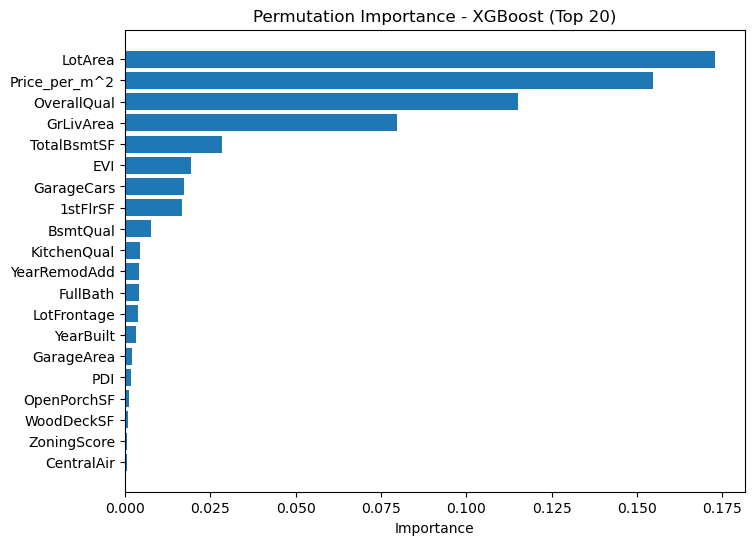

In [81]:
from sklearn.inspection import permutation_importance

result_xgb_perm = permutation_importance(
    best_xgb,            
    X_valid, 
    y_valid,
    n_repeats=10,
    random_state=42,
    scoring="r2"
)

perm_xgb_importance = pd.DataFrame({
    "feature": X_valid.columns,
    "importance": result_xgb_perm.importances_mean
}).sort_values("importance", ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(perm_xgb_importance["feature"][:20], perm_xgb_importance["importance"][:20])
plt.title("Permutation Importance - XGBoost (Top 20)")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()

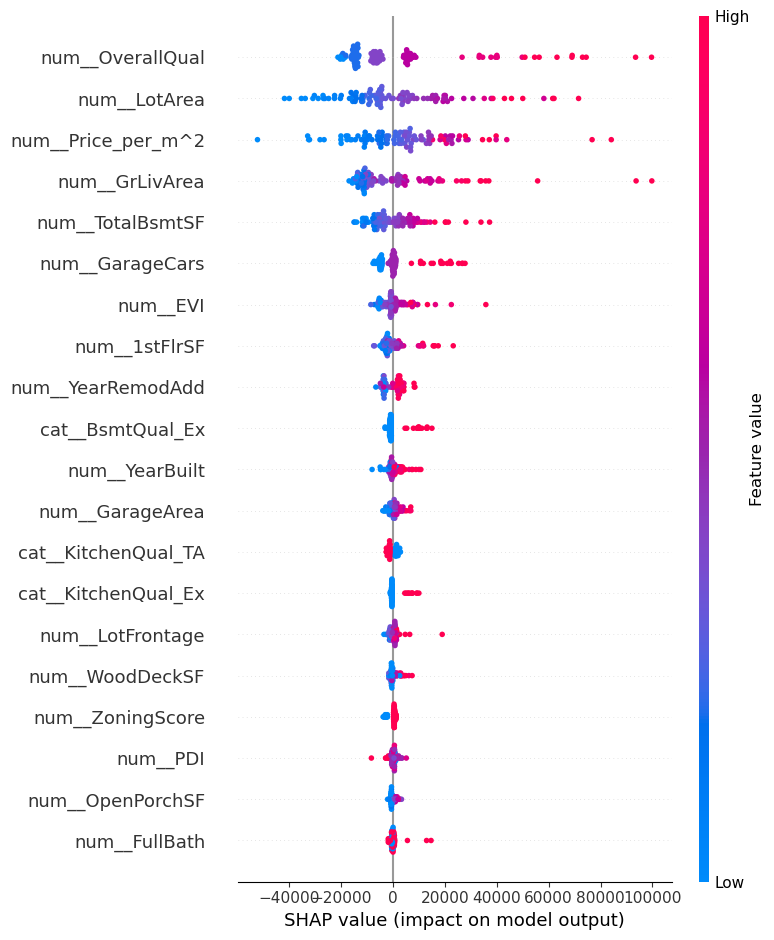

In [84]:
import shap

shap_sample = X_valid.sample(min(100, len(X_valid)), random_state=42)

xgb_model_only = best_xgb.named_steps["regressor"]
X_valid_pre = best_xgb.named_steps["preprocess"].transform(shap_sample)

explainer = shap.TreeExplainer(xgb_model_only)
shap_values = explainer.shap_values(X_valid_pre)

shap.summary_plot(shap_values, X_valid_pre, feature_names=best_xgb.named_steps["preprocess"].get_feature_names_out())

    CATBOOST

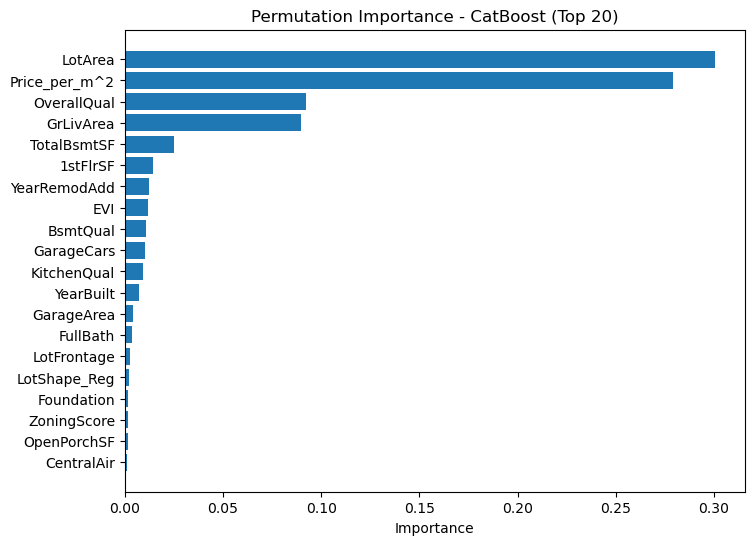

In [85]:
result_cat_perm = permutation_importance(
    best_cat,           
    X_valid_cb,         
    y_valid,
    n_repeats=10,
    random_state=42,
    scoring="r2"
)

perm_cat_importance = pd.DataFrame({
    "feature": X_valid_cb.columns,
    "importance": result_cat_perm.importances_mean
}).sort_values("importance", ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(perm_cat_importance["feature"][:20], perm_cat_importance["importance"][:20])
plt.title("Permutation Importance - CatBoost (Top 20)")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()

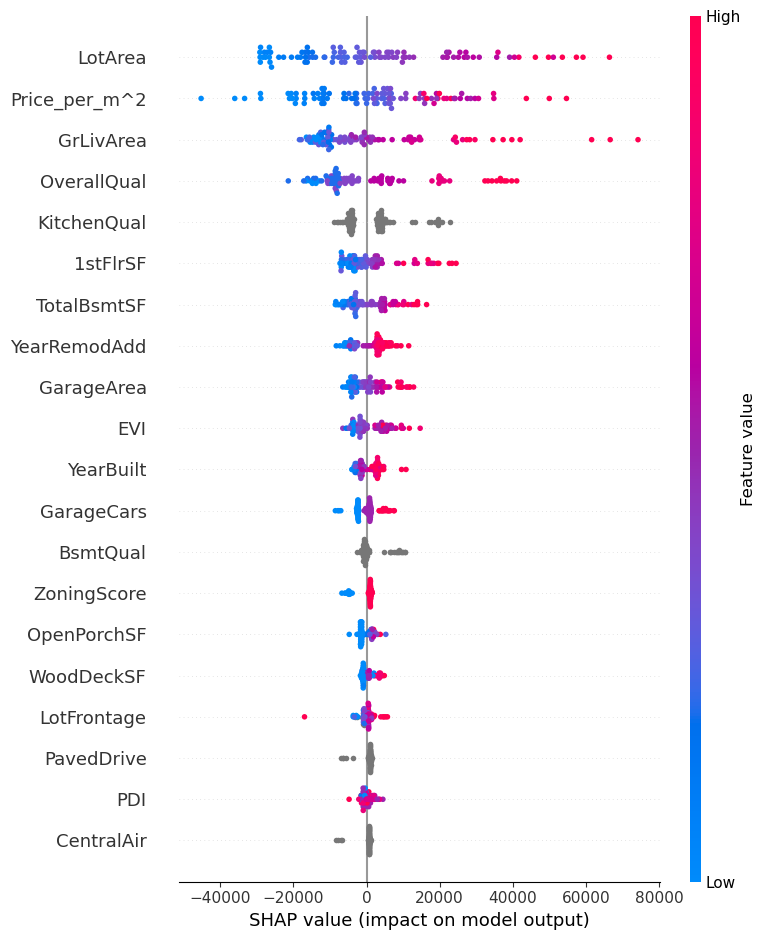

In [86]:
import shap

shap_sample_cb = X_valid_cb.sample(min(100, len(X_valid_cb)), random_state=42)

explainer_cb = shap.TreeExplainer(cat)
shap_values_cb = explainer_cb.shap_values(shap_sample_cb)

shap.summary_plot(shap_values_cb, shap_sample_cb)